In [3]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
def read_bl2(path):
    return np.core.records.fromfile(str(path),formats='i8,(2048)i2',names='index,wave')

In [5]:
def read_truth(path):
    return np.core.records.fromfile(str(path),formats='i8,i2,i2,(6)i2,i2,i2',names='index,label,numPro,naught,T0,max')

In [6]:
basepath = Path("/Users/elicarter/Local/FominResearch/RealData/Runs/pseudoData/sim100k_wfs.dat")
data = read_bl2(basepath)["wave"]
#CUT OFF AT 10K EVENTS
cutOff = 10000
trainingData = data[:cutOff] 
data = data[cutOff:]

In [7]:
truthTable = read_truth(Path("/Users/elicarter/Local/FominResearch/RealData/Runs/pseudoData/sim100k_proEventList.dat"))["label"]
trainingTruthTable = truthTable[:cutOff]
dataTruthTable = truthTable[cutOff:]

# Relabel

Mark 1,2,3,8 as 0 and 0,4,5,6,7 as 1 to try and focus on finding them

In [8]:
for i in range(len(dataTruthTable)):
    if dataTruthTable[i] == 1 or dataTruthTable[i] == 2 or dataTruthTable[i] == 3 or dataTruthTable[i] == 8:
        dataTruthTable[i] = 0
    else:
        dataTruthTable[i] = 1
for i in range(len(trainingTruthTable)):
    if trainingTruthTable[i] == 1 or trainingTruthTable[i] == 2 or trainingTruthTable[i] == 3 or trainingTruthTable[i] == 8:
        trainingTruthTable[i] = 0
    else:
        trainingTruthTable[i] = 1

In [9]:
print(trainingTruthTable)

[0 0 1 ... 0 0 0]


In [10]:
gc.collect()

55

# Start SVM

In [11]:
newClf = True

In [12]:
if newClf == True:
    clf = svm.SVC()
    clf.fit(trainingData, trainingTruthTable)
else:
    filename = 'RareTrained_model.sav'
    clf = pickle.load(open(filename, 'rb'))

In [13]:
print(trainingData.shape)
print(data.shape)
print(trainingTruthTable.shape)

(10000, 2048)
(90000, 2048)
(10000,)


In [14]:
labels = clf.predict(data)
print(accuracy_score(dataTruthTable, labels))

0.9979666666666667


In [15]:
df = pd.DataFrame(confusion_matrix(dataTruthTable, labels))

In [16]:
df

,0,1
0,87126,86
1,97,2691


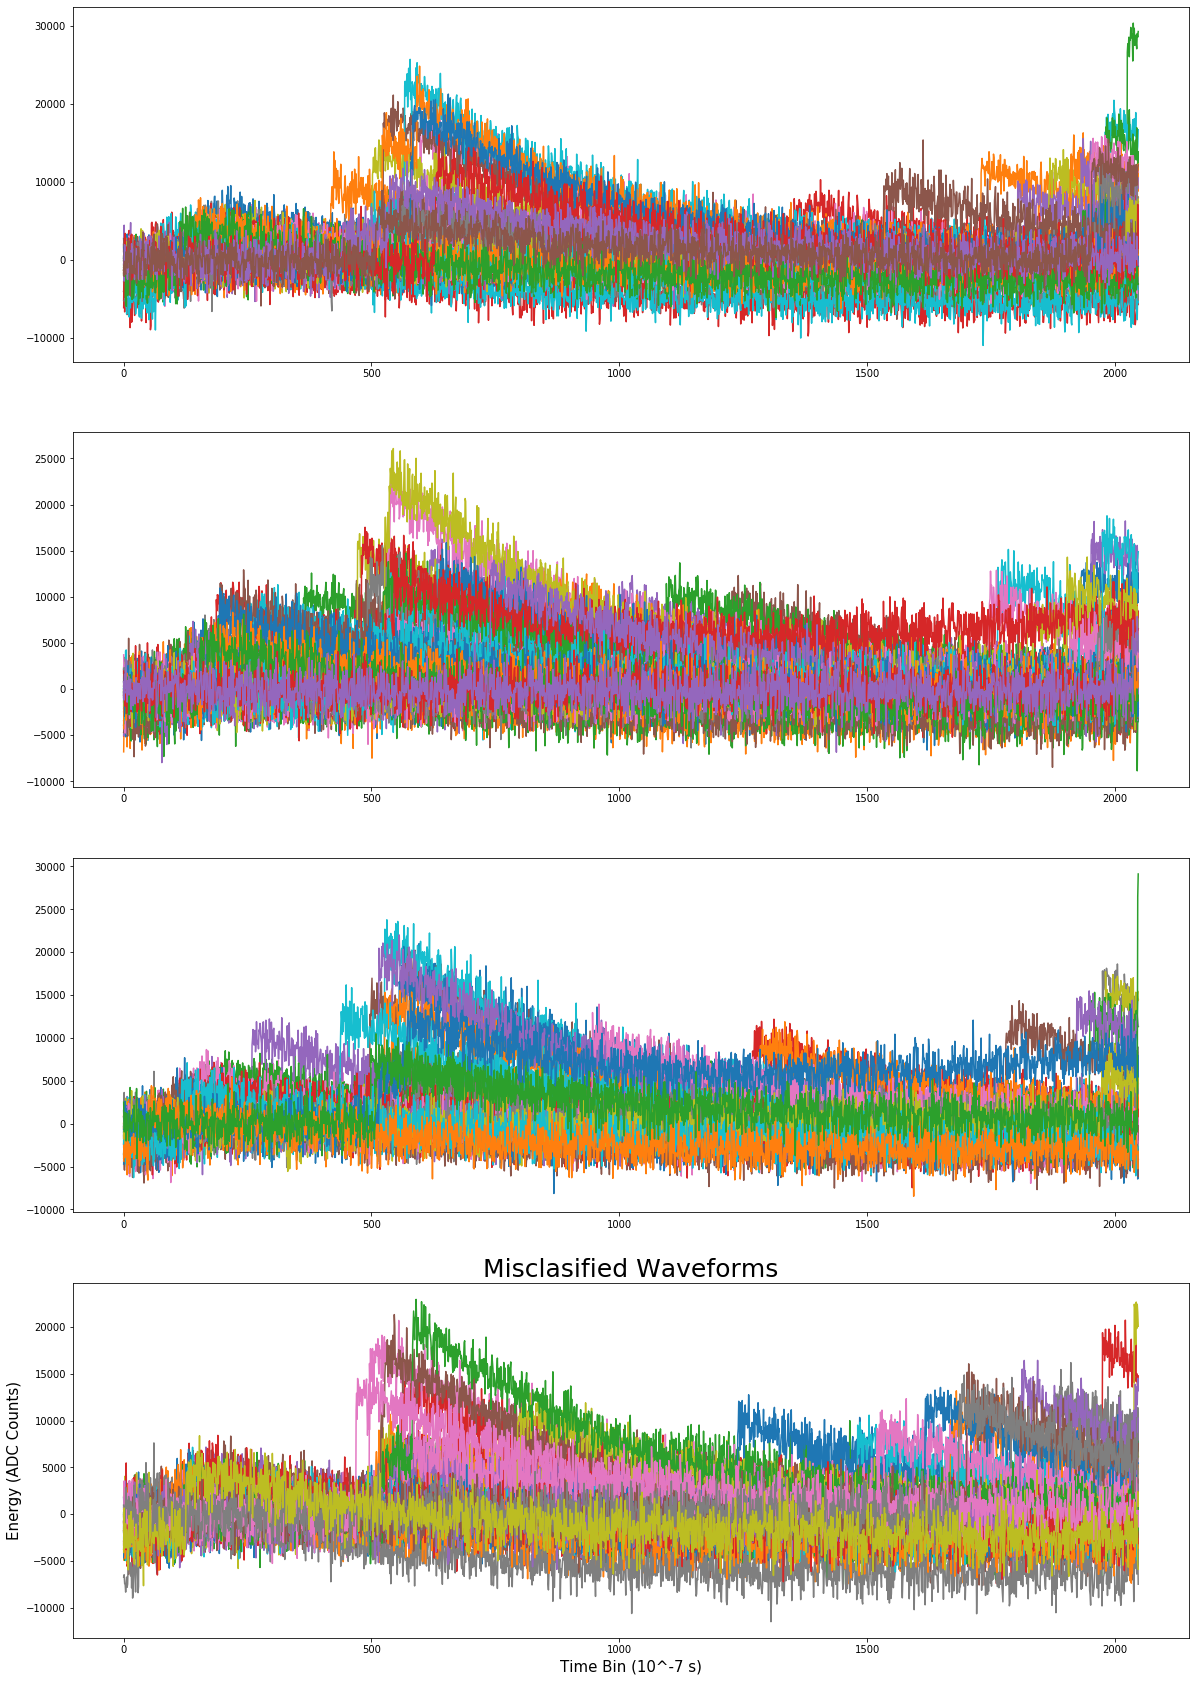

In [27]:
fig, ax = plt.subplots(4, figsize = (20,30))
for j in range(4):
    numPer = len(labels)//4
    for i in range(j*numPer, numPer*(j+1)):
        if labels[i] != dataTruthTable[i]:
            t = np.arange(2048)
            ax[j].plot(t, data[i])
fig = plt.title("Misclasified Waveforms", fontsize=25)
fig = plt.xlabel("Time Bin (10^-7 s)", fontsize=15)
fig = plt.ylabel("Energy (ADC Counts)", fontsize=15)
fig = plt.gcf()
#fig.set_size_inches(18.5, 8.5)